In [ ]:
!pip install ktrain datasets accelerate transformers -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.3/25.3 MB 42.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 542.0/542.0 kB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.6/302.6 kB 37.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.1/9.1 MB 86.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 54.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 468.8/468.8 kB 32.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 18.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing me

In [ ]:
from google.colab import drive
import pandas as pd
import seaborn as sns
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import ktrain
import joblib
from ktrain import text
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, accuracy_score
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.utils import resample
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from datasets import Dataset, DatasetDict

# Import data clean

In [ ]:
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/satria_data/stemmed.csv'

Mounted at /content/drive


In [ ]:
df = pd.read_csv(file_path)
df

,Unnamed: 0,text,label
0,0,kunjung prabowo resmi serah proyek bantu air b...,Sumber Daya Alam
1,1,anies tepuk tangan riah rektor wajib mata kuli...,Politik
2,2,emng bener dukung 01 goblok dukung 02 hnya sj ...,Demografi
3,3,waktu anies sikap kritis kerja pak prabowo ang...,Politik
4,4,anies baswedan harap asn masuk tni polri pegan...,Politik
...,...,...,...
4995,4995,ngeliat debat kemaren pas prabowo kicep kira k...,Politik
4996,4996,masyarakat yakin prabowogibran milik visi jala...,Politik
4997,4997,imo irrational satu jauh lebih irrational tbh ...,Ekonomi
4998,4998,look pak ganjar kecimpung lgislatif eksekutif ...,Pertahanan dan Keamanan


In [ ]:
label_categories = df['label'].unique()
label_mapping = {label: i for i, label in enumerate(label_categories)}
df['label_num'] = df['label'].map(label_mapping)
df

,Unnamed: 0,text,label,label_num
0,0,kunjung prabowo resmi serah proyek bantu air b...,Sumber Daya Alam,0
1,1,anies tepuk tangan riah rektor wajib mata kuli...,Politik,1
2,2,emng bener dukung 01 goblok dukung 02 hnya sj ...,Demografi,2
3,3,waktu anies sikap kritis kerja pak prabowo ang...,Politik,1
4,4,anies baswedan harap asn masuk tni polri pegan...,Politik,1
...,...,...,...,...
4995,4995,ngeliat debat kemaren pas prabowo kicep kira k...,Politik,1
4996,4996,masyarakat yakin prabowogibran milik visi jala...,Politik,1
4997,4997,imo irrational satu jauh lebih irrational tbh ...,Ekonomi,5
4998,4998,look pak ganjar kecimpung lgislatif eksekutif ...,Pertahanan dan Keamanan,3


In [ ]:
df = df.drop(columns=['Unnamed: 0'])
df.isna().sum()

text         9
label        0
label_num    0
dtype: int64

In [ ]:
df= df.dropna(subset=['text'])
df.isna().sum()

text         0
label        0
label_num    0
dtype: int64

In [ ]:
df

,text,label,label_num
0,kunjung prabowo resmi serah proyek bantu air b...,Sumber Daya Alam,0
1,anies tepuk tangan riah rektor wajib mata kuli...,Politik,1
2,emng bener dukung 01 goblok dukung 02 hnya sj ...,Demografi,2
3,waktu anies sikap kritis kerja pak prabowo ang...,Politik,1
4,anies baswedan harap asn masuk tni polri pegan...,Politik,1
...,...,...,...
4995,ngeliat debat kemaren pas prabowo kicep kira k...,Politik,1
4996,masyarakat yakin prabowogibran milik visi jala...,Politik,1
4997,imo irrational satu jauh lebih irrational tbh ...,Ekonomi,5
4998,look pak ganjar kecimpung lgislatif eksekutif ...,Pertahanan dan Keamanan,3


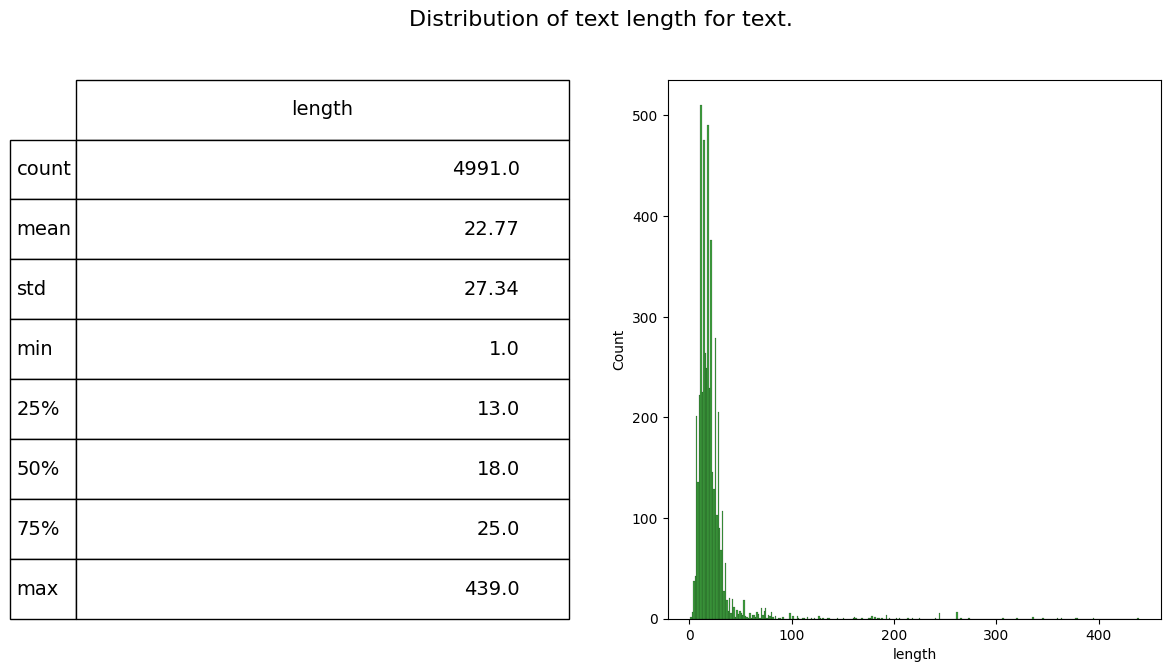

In [ ]:
#Mencari rata-rata panjang text
fig = plt.figure(figsize=(14,7))
df['length'] = df.text.str.split().apply(len)
ax1 = fig.add_subplot(122)
sns.histplot(df['length'], ax=ax1,color='green')
describe = df.length.describe().to_frame().round(2)

ax2 = fig.add_subplot(121)
ax2.axis('off')
font_size = 14
bbox = [0, 0, 1, 1]
table = ax2.table(cellText = describe.values, rowLabels = describe.index, bbox=bbox, colLabels=describe.columns)
table.set_fontsize(font_size)
fig.suptitle('Distribution of text length for text.', fontsize=16)

plt.show()

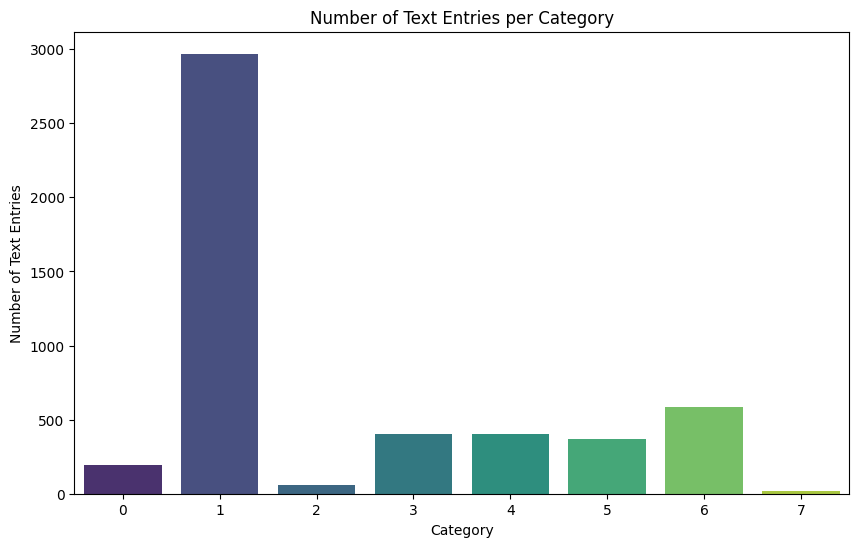

In [ ]:
#Distribusi tweet tiap kategori
label_counts = df['label_num'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Number of Text Entries')
plt.title('Number of Text Entries per Category')
plt.show()

In [ ]:
#Melakukan balancing data dengan oversampling
df_majority = df[df['label_num'] == 1]
upsampled_minority_classes = []
for label_num in range(0, 8):
  if label_num == 1:
    continue
  else:
    df_minority = df[df['label_num'] == label_num]
    df_minority_upsampled = resample(df_minority,
                                     replace=True,
                                     n_samples=len(df_majority),
                                     random_state=42)
    upsampled_minority_classes.append(df_minority_upsampled)


df_upsampled = pd.concat([df_majority] + upsampled_minority_classes)

In [ ]:
df_upsampled

,text,label,label_num,length
1,anies tepuk tangan riah rektor wajib mata kuli...,Politik,1,14
3,waktu anies sikap kritis kerja pak prabowo ang...,Politik,1,26
4,anies baswedan harap asn masuk tni polri pegan...,Politik,1,10
5,duh jangan pak lurah denger acara hajat rakyat...,Politik,1,39
7,anies allah sibuk orang zalim jahat orang zali...,Politik,1,9
...,...,...,...,...
3432,peta politik lihat dulu sama pak anies sekaran...,Geografi,7,19
529,tiktok bilang anies ken bangun 40 kota jakarta...,Geografi,7,11
4440,pulau jalan krna udah duluan sblum anies naik ...,Geografi,7,23
4124,kampung ku aeange deket bukit tinggi kamoung t...,Geografi,7,31


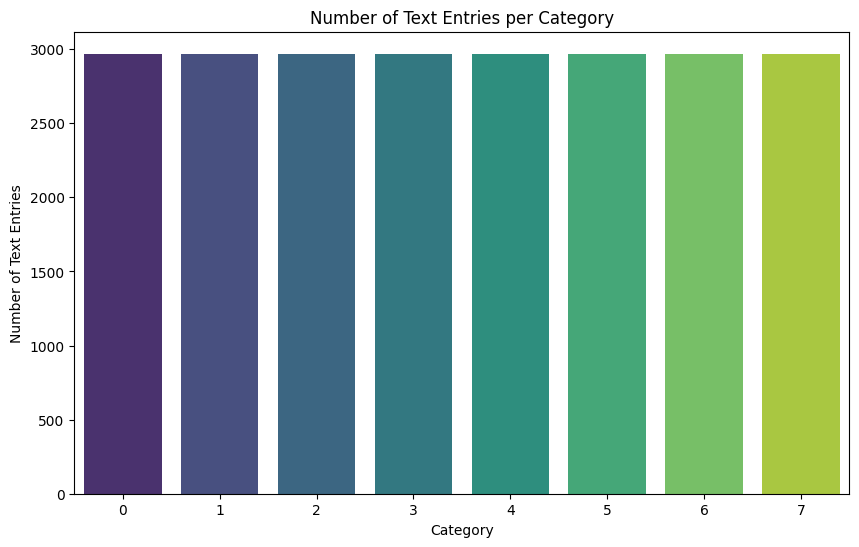

In [ ]:
label_counts = df_upsampled['label_num'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, palette='viridis')
plt.xlabel('Category')
plt.ylabel('Number of Text Entries')
plt.title('Number of Text Entries per Category')
plt.show()

In [ ]:
vectorizer = TfidfVectorizer()
Xr = vectorizer.fit_transform(df_upsampled['text'])
yr = df_upsampled['label_num']

Xr_train, Xr_val, yr_train, yr_val = train_test_split(Xr, yr, test_size=0.2, random_state=42)

joblib.dump(vectorizer, '/content/drive/My Drive/satria_data/tfidf_vectorizer.pkl')
# smote = SMOTE(sampling_strategy='minority',random_state=42)
# Xr_train_res, yr_train_res = smote.fit_resample(Xr_train, yr_train)

['/content/drive/My Drive/satria_data/tfidf_vectorizer.pkl']

# RandomForest

Random Forest Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       632
           1       0.98      0.93      0.96       563
           2       0.97      0.97      0.97       580
           3       0.96      0.98      0.97       567
           4       0.97      0.98      0.97       605
           5       0.98      0.98      0.98       573
           6       0.99      0.98      0.98       633
           7       1.00      1.00      1.00       598

    accuracy                           0.98      4751
   macro avg       0.98      0.98      0.98      4751
weighted avg       0.98      0.98      0.98      4751



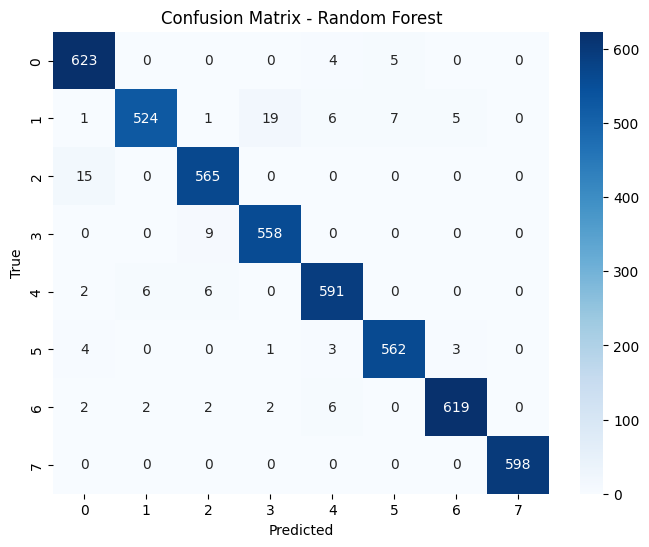

['/content/drive/My Drive/satria_data/random_forest_model.pkl']

In [ ]:
rf = RandomForestClassifier(class_weight='balanced')
rf.fit(Xr_train, yr_train)

yr_pred = rf.predict(Xr_val)
print("Random Forest Report:")
print(classification_report(yr_val, yr_pred))

conf_matrix = confusion_matrix(yr_val, yr_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - Random Forest')
plt.show()
joblib.dump(rf, '/content/drive/My Drive/satria_data/random_forest_model.pkl')

## With AdaBoost

In [ ]:
# rfc = RandomForestClassifier(n_estimators=100, max_depth=9, random_state=0)


# abc = AdaBoostClassifier(base_estimator=rfc, learning_rate=0.2, n_estimators=100)
# abc.fit(Xr_train, yr_train)


# yr_pred_abc = abc.predict(Xr_val)
# print("Accuracy: " + str(accuracy_score(yr_val, yr_pred_abc)))
# print(classification_report(yr_val, yr_pred_abc))

# conf_matrix_abc = confusion_matrix(yr_val, yr_pred_abc)
# plt.figure(figsize=(8, 6))
# sns.heatmap(conf_matrix_abc, annot=True, fmt='d', cmap='Blues')
# plt.xlabel('Predicted')
# plt.ylabel('True')
# plt.title('Confusion Matrix - AdaBoost with Random Forest')
# plt.show()

# SVM

SVM Report:
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       632
           1       0.97      0.95      0.96       563
           2       0.97      0.97      0.97       580
           3       0.98      0.98      0.98       567
           4       0.96      0.98      0.97       605
           5       0.98      0.98      0.98       573
           6       0.99      0.97      0.98       633
           7       1.00      1.00      1.00       598

    accuracy                           0.98      4751
   macro avg       0.98      0.98      0.98      4751
weighted avg       0.98      0.98      0.98      4751



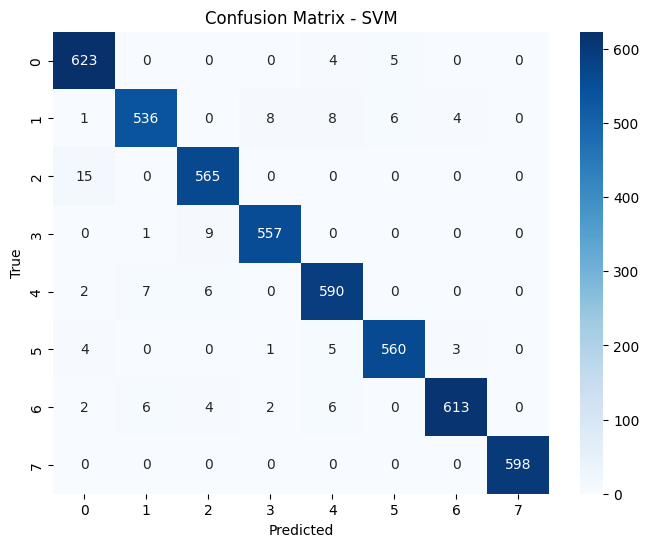

['/content/drive/My Drive/satria_data/svm_model.pkl']

In [ ]:
svm = SVC(class_weight='balanced')
svm.fit(Xr_train, yr_train)
yr_pred = svm.predict(Xr_val)
print("SVM Report:")
print(classification_report(yr_val, yr_pred))
conf_matrix = confusion_matrix(yr_val, yr_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix - SVM')
plt.show()
joblib.dump(rf, '/content/drive/My Drive/satria_data/svm_model.pkl')

# BERT

In [ ]:
texts = df_upsampled['text'].tolist()
labels = df_upsampled['label_num'].tolist()

train_texts, val_texts, train_labels, val_labels = train_test_split(texts, labels, test_size=0.2, stratify=labels)

In [ ]:
(x_train, y_train), (x_val, y_val), preproc = text.texts_from_array(
    x_train=train_texts,
    y_train=train_labels,
    x_test=val_texts,
    y_test=val_labels,
    class_names=[str(i) for i in range(8)],
    preprocess_mode='bert',
    maxlen=50,
    max_features=35000
)


downloading pretrained BERT model (multi_cased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: id


Is Multi-Label? False
preprocessing test...
language: id


task: text classification


In [ ]:
model = text.text_classifier('bert', (x_train, y_train), preproc=preproc)

Is Multi-Label? False
maxlen is 50


/usr/local/lib/python3.10/dist-packages/keras/src/initializers/initializers.py:120: UserWarning: The initializer GlorotNormal is unseeded and being called multiple times, which will return identical values each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initializer instance more than once.
  warnings.warn(


done.


In [ ]:
learner = ktrain.get_learner(model, train_data=(x_train, y_train), val_data=(x_val, y_val), batch_size=16)

# Train the model
learner.fit_onecycle(2e-5, 3)



begin training using onecycle policy with max lr of 2e-05...
Epoch 1/3
1188/1188 [==============================] - 315s 243ms/step - loss: 0.9803 - accuracy: 0.6564 - val_loss: 0.4379 - val_accuracy: 0.8527
Epoch 2/3
1188/1188 [==============================] - 287s 242ms/step - loss: 0.2971 - accuracy: 0.9013 - val_loss: 0.1601 - val_accuracy: 0.9461
Epoch 3/3
1188/1188 [==============================] - 287s 241ms/step - loss: 0.1000 - accuracy: 0.9676 - val_loss: 0.0976 - val_accuracy: 0.9676


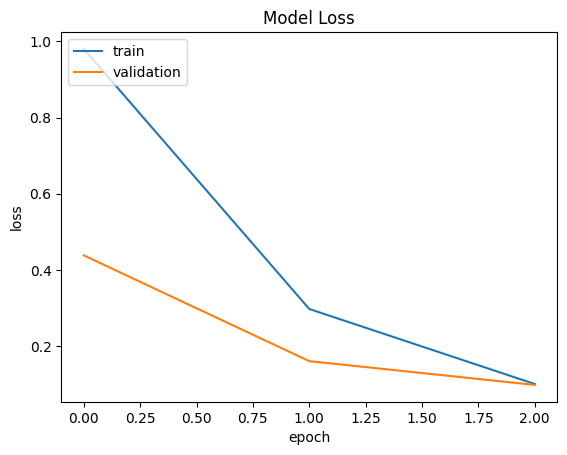

In [ ]:
learner.plot()

In [ ]:
preds = learner.predict(val_data=(x_val, y_val))

149/149 [==============================] - 22s 114ms/step


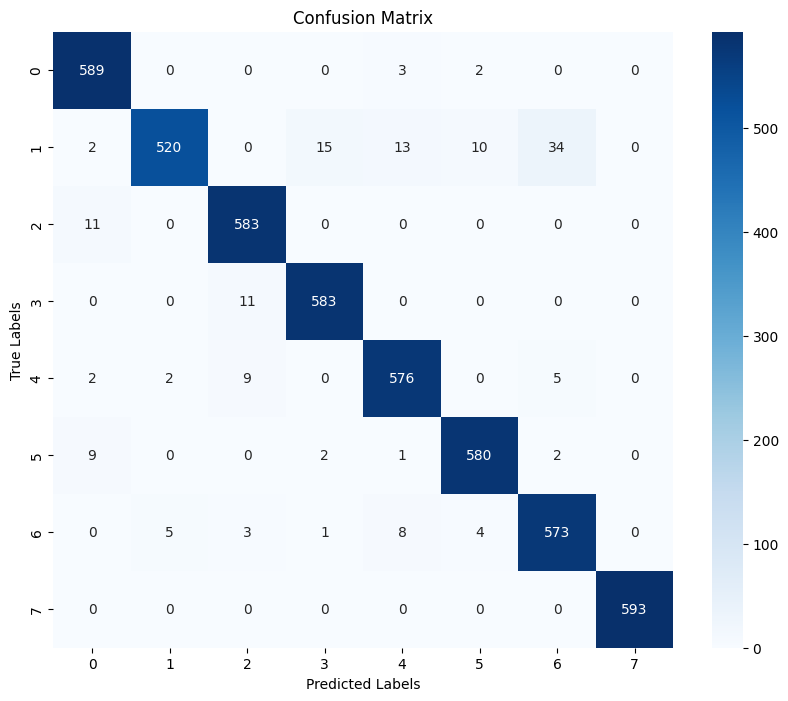

In [ ]:
y_val_labels = np.argmax(y_val, axis=1)
preds_labels = np.argmax(preds, axis=1)

conf_matrix = confusion_matrix(y_val_labels, preds_labels)

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_val_labels), yticklabels=np.unique(y_val_labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
report = classification_report(y_val_labels, preds_labels)

print(report)

              precision    recall  f1-score   support

           0       0.96      0.99      0.98       594
           1       0.99      0.88      0.93       594
           2       0.96      0.98      0.97       594
           3       0.97      0.98      0.98       594
           4       0.96      0.97      0.96       594
           5       0.97      0.98      0.97       594
           6       0.93      0.96      0.95       594
           7       1.00      1.00      1.00       593

    accuracy                           0.97      4751
   macro avg       0.97      0.97      0.97      4751
weighted avg       0.97      0.97      0.97      4751



In [ ]:
predictor = ktrain.get_predictor(learner.model, preproc)
predictor.get_classes()

['0', '1', '2', '3', '4', '5', '6', '7']

In [ ]:
predictor.save('/content/drive/My Drive/satria_data/Bert_Model_Text_Classification')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# IndoBERTweet

In [ ]:
model_name = "indolem/indobertweet-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=8)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/235k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

In [ ]:
dataset = Dataset.from_pandas(df_upsampled[['text','label_num']])
dataset = dataset.rename_column('label_num', 'label')

dataset = dataset.train_test_split(test_size=0.2)

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples['text'], truncation=True, padding='max_length', max_length=128)

tokenized_datasets = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/19001 [00:00<?, ? examples/s]

Map:   0%|          | 0/4751 [00:00<?, ? examples/s]

In [ ]:
training_args = TrainingArguments(
    output_dir='./results',
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
)

In [ ]:
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
)

trainer.train()

{'loss': 0.9274, 'grad_norm': 9.79712200164795, 'learning_rate': 1.719416386083053e-05, 'epoch': 0.4208754208754209}
{'loss': 0.3595, 'grad_norm': 4.115321636199951, 'learning_rate': 1.4388327721661056e-05, 'epoch': 0.8417508417508418}
{'eval_loss': 0.2129029780626297, 'eval_runtime': 34.792, 'eval_samples_per_second': 136.555, 'eval_steps_per_second': 8.536, 'epoch': 1.0}
{'loss': 0.2185, 'grad_norm': 0.9230483770370483, 'learning_rate': 1.1582491582491585e-05, 'epoch': 1.2626262626262625}
{'loss': 0.1482, 'grad_norm': 11.366069793701172, 'learning_rate': 8.77665544332211e-06, 'epoch': 1.6835016835016834}
{'eval_loss': 0.1632009595632553, 'eval_runtime': 34.5633, 'eval_samples_per_second': 137.458, 'eval_steps_per_second': 8.593, 'epoch': 2.0}
{'loss': 0.1125, 'grad_norm': 39.58882141113281, 'learning_rate': 5.970819304152637e-06, 'epoch': 2.1043771043771042}
{'loss': 0.0944, 'grad_norm': 0.07544984668493271, 'learning_rate': 3.1649831649831652e-06, 'epoch': 2.525252525252525}
{'loss'

TrainOutput(global_step=3564, training_loss=0.2740387694469071, metrics={'train_runtime': 1428.3985, 'train_samples_per_second': 39.907, 'train_steps_per_second': 2.495, 'train_loss': 0.2740387694469071, 'epoch': 3.0})

In [ ]:
eval_results = trainer.evaluate()
print(f"Evaluation results: {eval_results}")

{'eval_loss': 0.15210920572280884, 'eval_runtime': 33.9827, 'eval_samples_per_second': 139.807, 'eval_steps_per_second': 8.74, 'epoch': 3.0}
Evaluation results: {'eval_loss': 0.15210920572280884, 'eval_runtime': 33.9827, 'eval_samples_per_second': 139.807, 'eval_steps_per_second': 8.74, 'epoch': 3.0}


In [ ]:
output_dir = '/content/drive/My Drive/satria_data/Indobertweet_Model_Text_Classification'
model.save_pretrained(output_dir)
tokenizer.save_pretrained(output_dir)

('/content/drive/My Drive/satria_data/Indobertweet_Model_Text_Classification/tokenizer_config.json',
 '/content/drive/My Drive/satria_data/Indobertweet_Model_Text_Classification/special_tokens_map.json',
 '/content/drive/My Drive/satria_data/Indobertweet_Model_Text_Classification/vocab.txt',
 '/content/drive/My Drive/satria_data/Indobertweet_Model_Text_Classification/added_tokens.json',
 '/content/drive/My Drive/satria_data/Indobertweet_Model_Text_Classification/tokenizer.json')

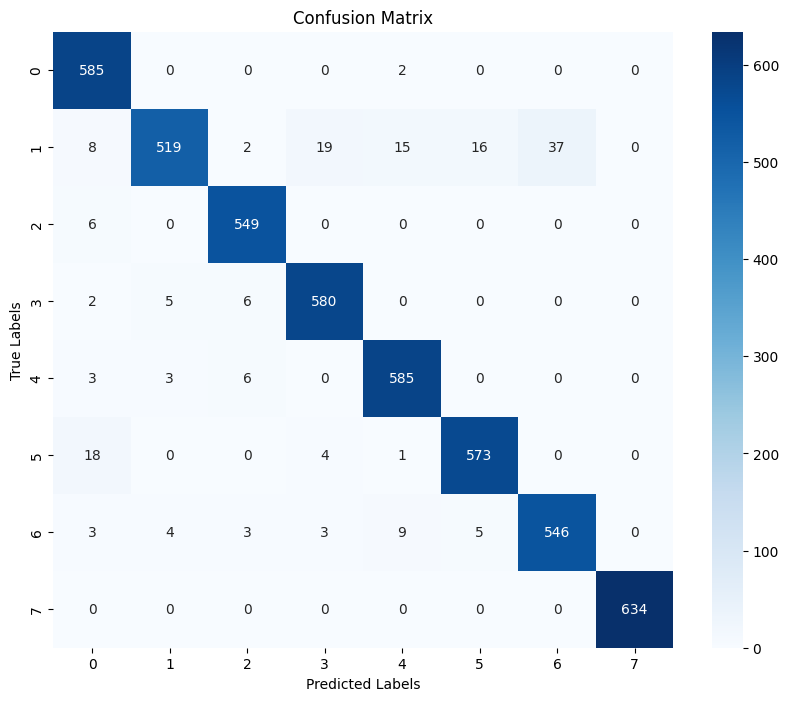


Classification Report:
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       587
           1       0.98      0.84      0.90       616
           2       0.97      0.99      0.98       555
           3       0.96      0.98      0.97       593
           4       0.96      0.98      0.97       597
           5       0.96      0.96      0.96       596
           6       0.94      0.95      0.94       573
           7       1.00      1.00      1.00       634

    accuracy                           0.96      4751
   macro avg       0.96      0.96      0.96      4751
weighted avg       0.96      0.96      0.96      4751



In [ ]:
predictions = trainer.predict(tokenized_datasets['test'])

predicted_labels = np.argmax(predictions.predictions, axis=1)
true_labels = tokenized_datasets['test']['label']

conf_matrix = confusion_matrix(true_labels, predicted_labels)

class_report = classification_report(true_labels, predicted_labels)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=np.unique(true_labels),
            yticklabels=np.unique(true_labels))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(class_report)